In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import os
import sys
from sklearn.utils import resample
sys.path.append("../")
from src.utils import categorical_to_numerical
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

#### Read the data

In [12]:
df = pd.read_csv("../data/employee_attrition.csv")
df.head()
# classes count
df['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

In [13]:
cols_ = ['HourlyRate', 'PercentSalaryHike', 'MonthlyRate', 'PerformanceRating', 'EducationField', 'EmployeeNumber', 'Over18', 'StandardHours', 'Education', 'Gender']
df_new = df.drop(cols_, axis=1)
df_new.head()

columns = df_new.columns.tolist()
print(columns)

new_cols = ['Age','BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'EmployeeCount', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# create a dummy data for testing in json format in which each field is key
params = {
    'Age': 53,
    'BusinessTravel': 'Travel_Rarely',
    'DailyRate': 1182,
    'Department': 'Research & Development',
    'DistanceFromHome': 2,
    'EmployeeCount': 1,
    'EnvironmentSatisfaction': 4,
    'JobInvolvement': 3,
    'JobLevel': 2,
    'JobRole': 'Research Scientist',
    'JobSatisfaction': 4,
    'MaritalStatus': 'Married',
    'MonthlyIncome': 15427,
    'NumCompaniesWorked': 1,
    'OverTime': 'No',
    'RelationshipSatisfaction': 3,
    'StockOptionLevel': 0,
    'TotalWorkingYears': 32,
    'TrainingTimesLastYear': 2,
    'WorkLifeBalance': 3,
    'YearsAtCompany': 5,
    'YearsInCurrentRole': 4,
    'YearsSinceLastPromotion': 1,
    'YearsWithCurrManager': 4,
}
print(len(new_cols))
print(len(params))

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'EmployeeCount', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
24
24


In [14]:
print(df['Attrition'].value_counts())

Attrition
No     1233
Yes     237
Name: count, dtype: int64


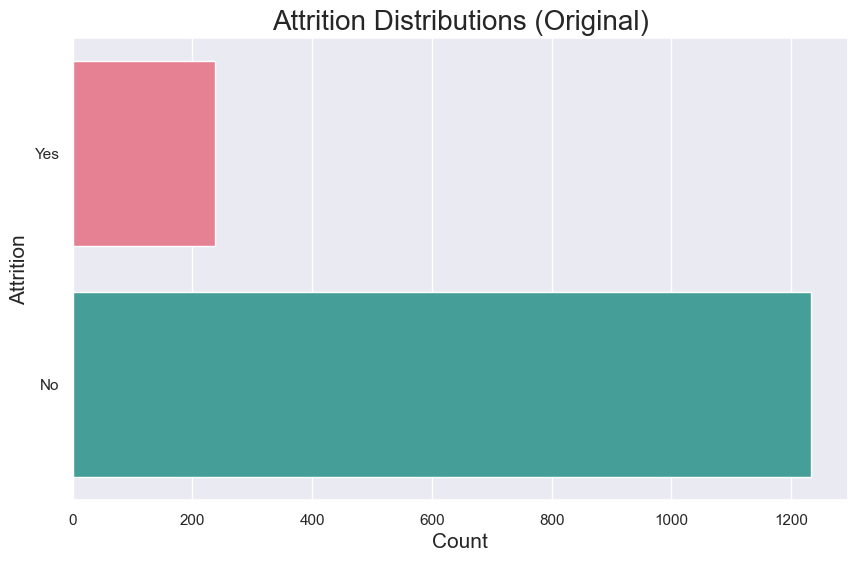

In [15]:
# plot a graph for show count of Attrition
plt.figure(figsize=(10, 6))
sns.countplot(df['Attrition'], palette='husl')
plt.title('Attrition Distributions (Original)', fontsize=20)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Attrition', fontsize=15)
plt.show()


In [16]:
# Oversample the minority class in attrition
df_majority = df[df['Attrition']=='No']
df_minority = df[df['Attrition']=='Yes']
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1233,    # to match majority class
                                 random_state=42) # reproducible results
df = pd.concat([df_majority, df_minority_upsampled])
df['Attrition'].value_counts()


Attrition
No     1233
Yes    1233
Name: count, dtype: int64

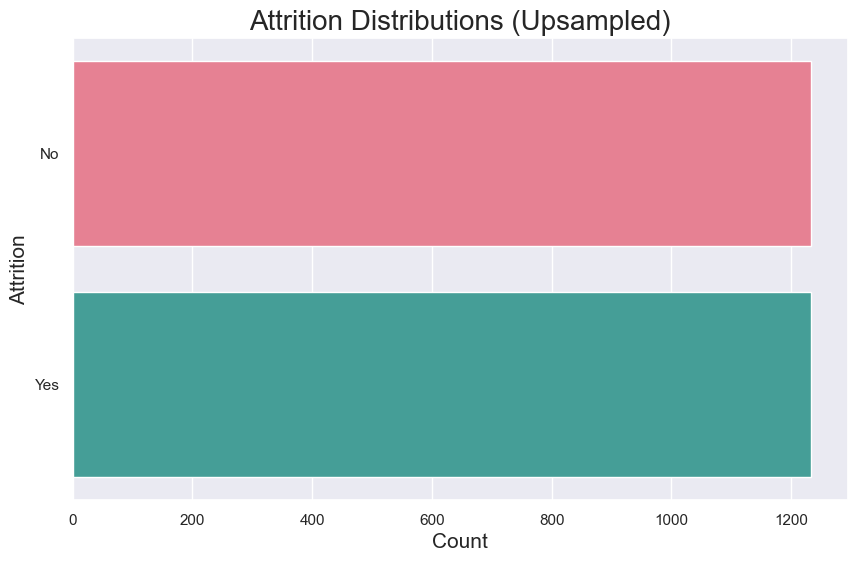

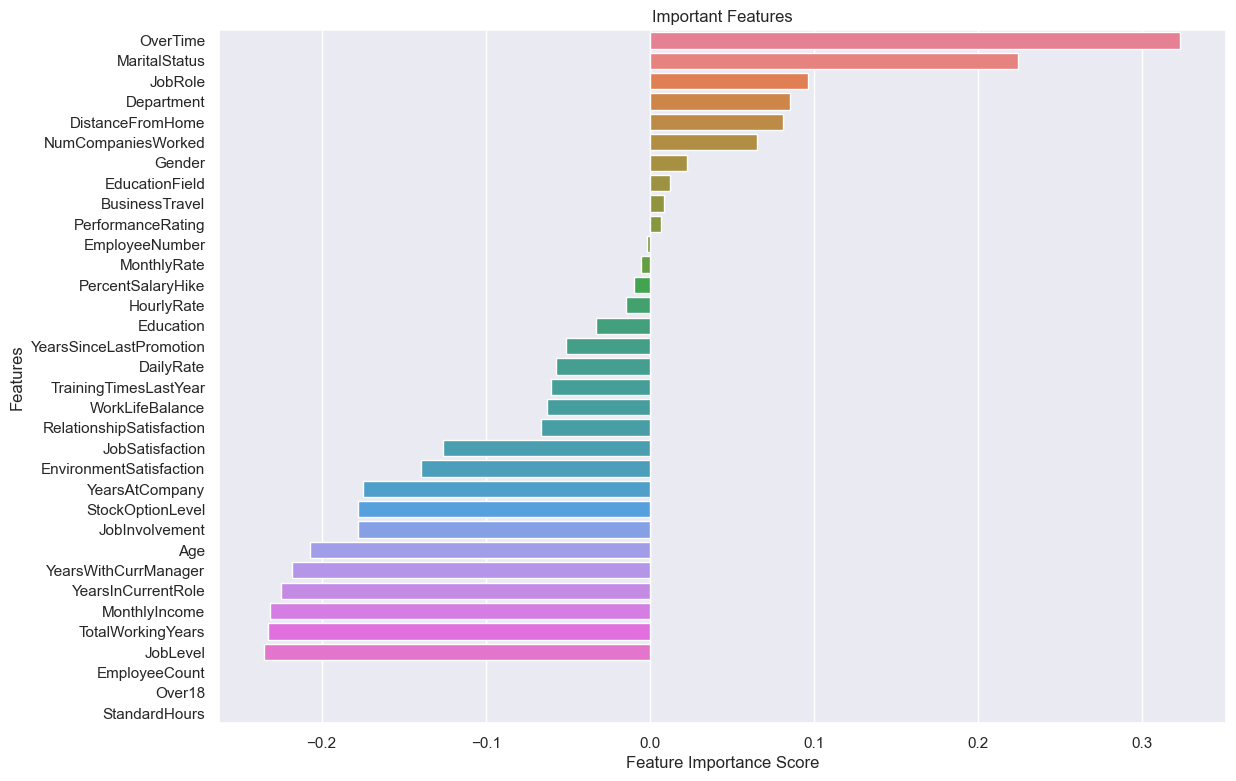

In [17]:
# plot a graph for show count of Attrition
plt.figure(figsize=(10, 6))
sns.countplot(df['Attrition'], palette='husl')
plt.title('Attrition Distributions (Upsampled)', fontsize=20)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Attrition', fontsize=15)
plt.show()


#Plot a bar chart of importance of features by correlation put feature names on y axis and correlation values on x axis
df= categorical_to_numerical(df)
corr = df.corr()
corr.sort_values(["Attrition"], ascending = False, inplace = True)
sns.set(rc = {'figure.figsize':(13,9)})
sns.barplot(x = corr.Attrition[1:], y = corr.index[1:], palette = 'husl')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")

# Displaying the plot
plt.show()




Accuracy of logistic regression classifier on test set: 0.70
Accuracy of logistic regression classifier on train set: 0.70
Precision, recall, f1, roc_auc score of logistic regression classifier on test set: 
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       234
           1       0.73      0.67      0.70       260

    accuracy                           0.70       494
   macro avg       0.70      0.70      0.70       494
weighted avg       0.70      0.70      0.70       494

Confusion matrix of logistic regression classifier on test set: 
[[170  64]
 [ 85 175]]


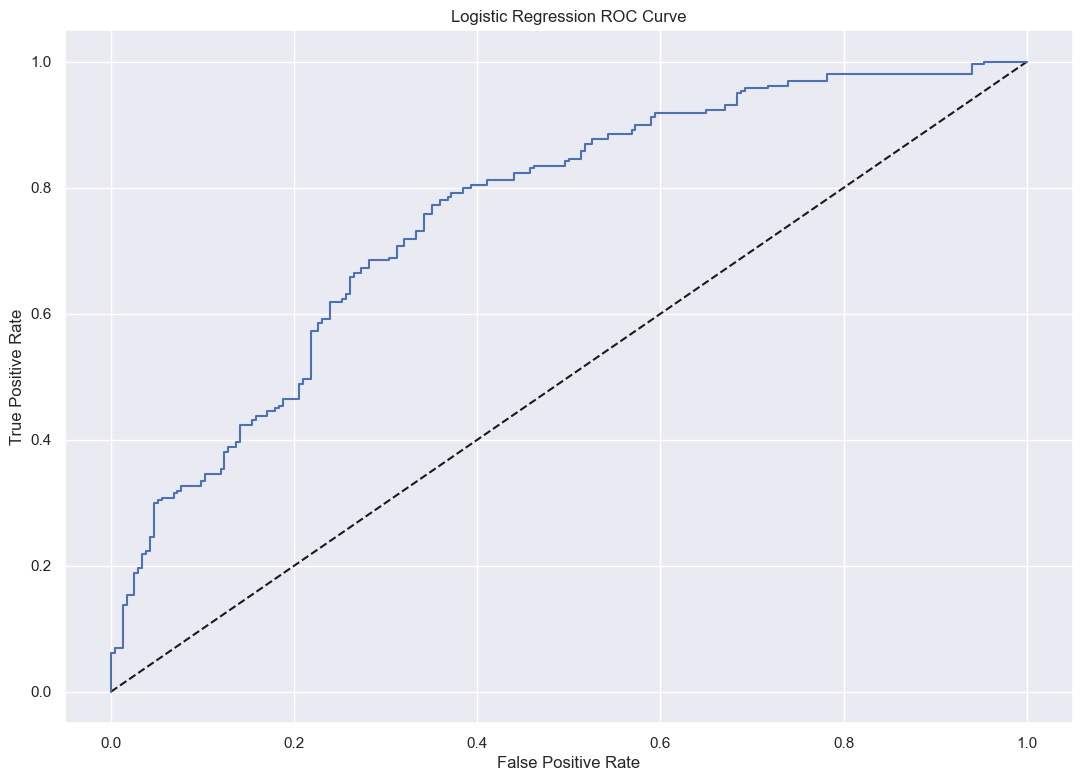

Accuracy of random forest classifier on test set: 0.97
Accuracy of random forest classifier on train set: 1.00
Confusion matrix of random forest classifier on test set: 
[[220  14]
 [  0 260]]
Precision, recall, f1, roc_auc score of random forest classifier on test set: 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       234
           1       0.95      1.00      0.97       260

    accuracy                           0.97       494
   macro avg       0.97      0.97      0.97       494
weighted avg       0.97      0.97      0.97       494



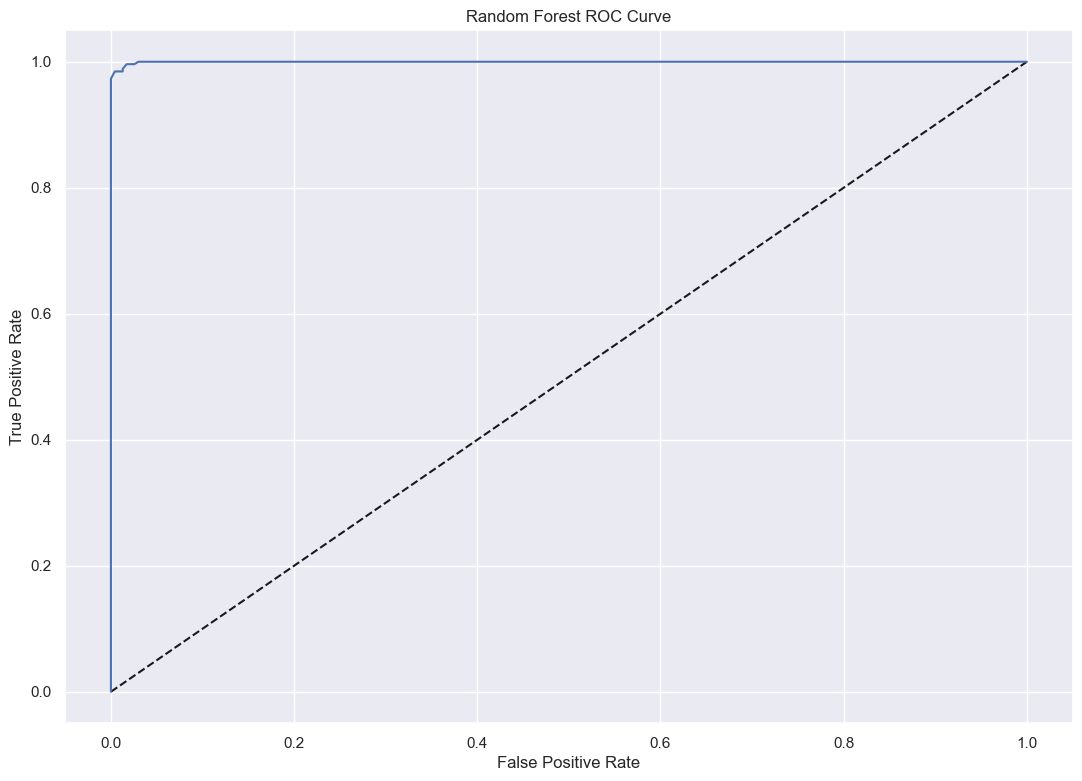

Accuracy of support vector classifier on test set: 0.63
Accuracy of support vector classifier on train set: 0.63
Confusion matrix of support vector classifier on test set: 
[[169  65]
 [119 141]]
Precision, recall, f1, roc_auc score of support vector classifier on test set: 
              precision    recall  f1-score   support

           0       0.59      0.72      0.65       234
           1       0.68      0.54      0.61       260

    accuracy                           0.63       494
   macro avg       0.64      0.63      0.63       494
weighted avg       0.64      0.63      0.63       494



Text(0.5, 1.0, 'SVM ROC Curve')

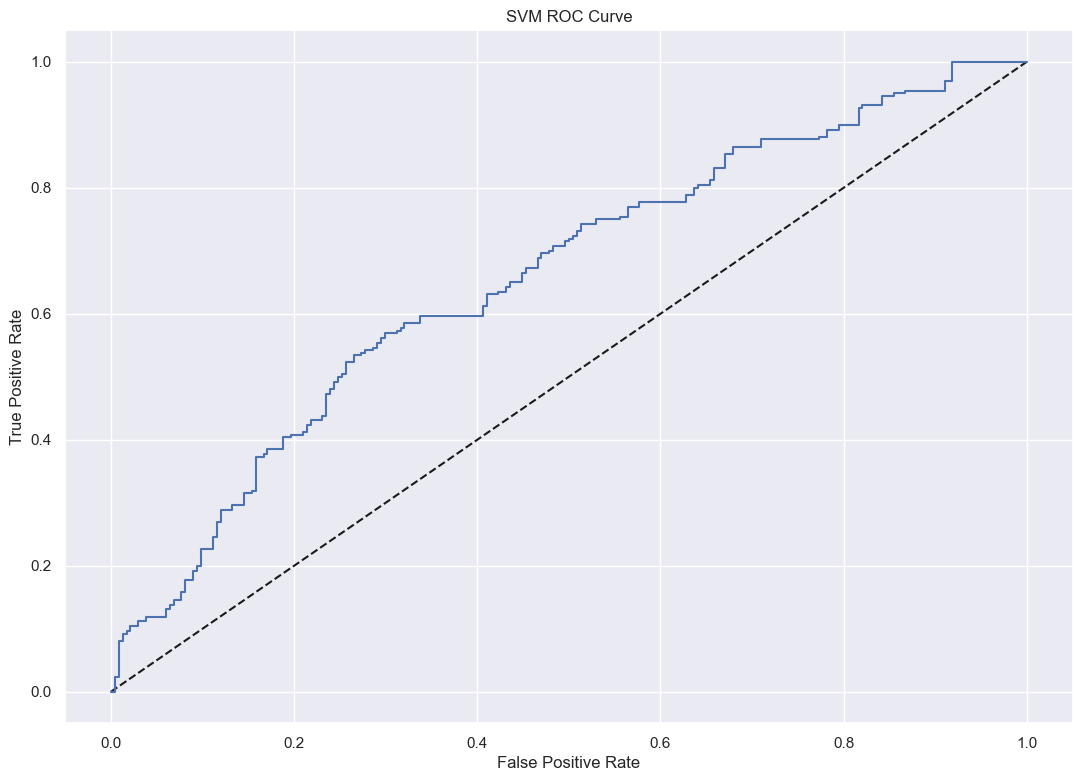

In [18]:
# Splitting the data into train and test

drop_cols = [
                    "HourlyRate",
                    "PercentSalaryHike",
                    "MonthlyRate",
                    "PerformanceRating",
                    "EducationField",
                    "EmployeeNumber",
                    "Over18",
                    "StandardHours",
                    "Education",
                    "Gender",
                ]
print("\n\n")
df_2 = df.copy().drop(drop_cols, axis=1)
df_2 = categorical_to_numerical(df_2)
X = df_2.drop(['Attrition'], axis=1)
y = df_2['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Precision, recall, f1, roc_auc score of logistic regression classifier on test set: \n{}'.format(classification_report(y_test, y_pred)))
print('Confusion matrix of logistic regression classifier on test set: \n{}'.format(confusion_matrix(y_test, y_pred)))
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

# Random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))
print('Accuracy of random forest classifier on train set: {:.2f}'.format(rf.score(X_train, y_train)))
print('Confusion matrix of random forest classifier on test set: \n{}'.format(confusion_matrix(y_test, y_pred)))
print('Precision, recall, f1, roc_auc score of random forest classifier on test set: \n{}'.format(classification_report(y_test, y_pred)))
y_pred_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('Accuracy of support vector classifier on test set: {:.2f}'.format(svc.score(X_test, y_test)))
print('Accuracy of support vector classifier on train set: {:.2f}'.format(svc.score(X_train, y_train)))
print('Confusion matrix of support vector classifier on test set: \n{}'.format(confusion_matrix(y_test, y_pred)))
print('Precision, recall, f1, roc_auc score of support vector classifier on test set: \n{}'.format(classification_report(y_test, y_pred)))
y_pred_prob = svc.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')

In [19]:
# Train random forest and print accuracy and confusion  matrix
rfc = RandomForestClassifier(n_estimators=250, max_depth=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred))

[[220  14]
 [  0 260]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       234
           1       0.95      1.00      0.97       260

    accuracy                           0.97       494
   macro avg       0.97      0.97      0.97       494
weighted avg       0.97      0.97      0.97       494

0.97165991902834


In [20]:
# Train Models and report the accuracy
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
print("\nConfusion Matrix of Logistic Regression Model: \n", confusion_matrix(y_test, log_pred))
print("Accuracy of Logistic Regression Model: ", log_model.score(X_test, y_test))

svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
print("\nConfusion Matrix of SVC Model: \n", confusion_matrix(y_test, svc_pred))
print("Accuracy of SVC Model: ", svc_model.score(X_test, y_test))


Confusion Matrix of Logistic Regression Model: 
 [[170  64]
 [ 85 175]]
Accuracy of Logistic Regression Model:  0.6983805668016194

Confusion Matrix of SVC Model: 
 [[169  65]
 [119 141]]
Accuracy of SVC Model:  0.6275303643724697
